## Align an Image to a template.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### Read Template and Scanned Image

In [2]:
template_img = cv2.imread("./NB8/form.jpg", cv2.IMREAD_COLOR)
template_img_rgb = cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB)

scanned_img = cv2.imread("./NB8/scanned-form.jpg", cv2.IMREAD_COLOR)
scanned_img_rgb = cv2.cvtColor(scanned_img, cv2.COLOR_BGR2RGB)

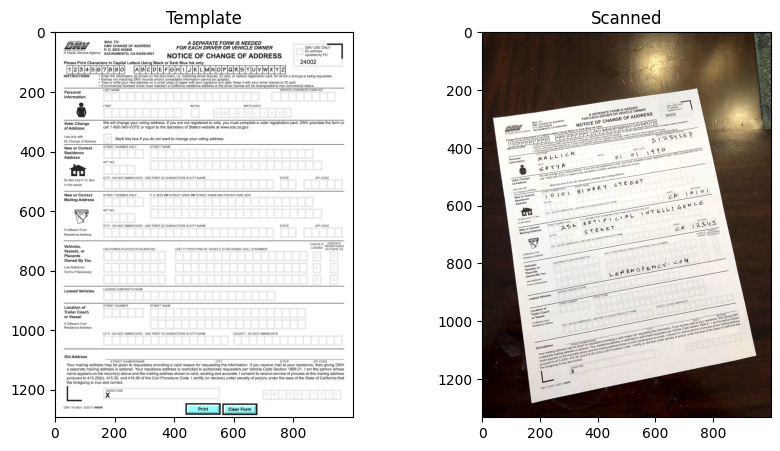

In [11]:
plt.figure(figsize=[10, 5])
plt.subplot(121); plt.imshow(template_img_rgb); plt.title("Template");
plt.subplot(122); plt.imshow(scanned_img_rgb); plt.title("Scanned");

#### Find keypoints in both images

In [14]:
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB)
scanned_gray = cv2.cvtColor(scanned_img, cv2.COLOR_BGR2GRAY)

MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)

template_keypoints, template_descriptors = orb.detectAndCompute(template_gray, None)
scanned_keypoints, scanned_descriptors = orb.detectAndCompute(scanned_gray, None)

template_disp = cv2.drawKeypoints(template_img_rgb, template_keypoints, outImage=np.array([]), color = (255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
scanned_disp = cv2.drawKeypoints(scanned_img_rgb, scanned_keypoints, outImage=np.array([]), color = (255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

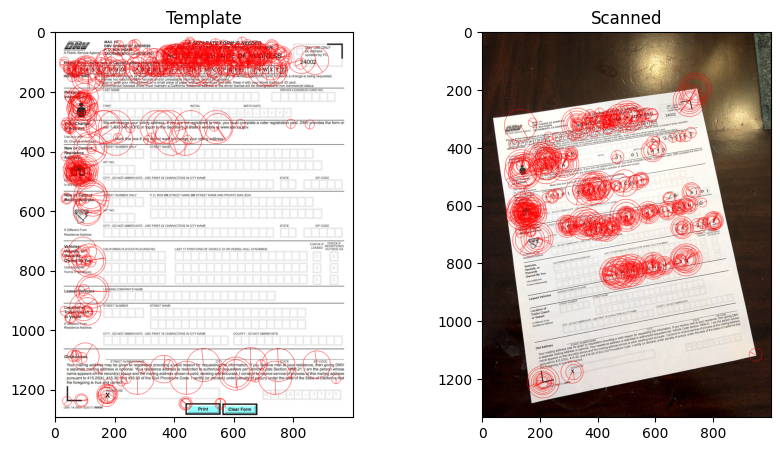

In [15]:
plt.figure(figsize=[10,5])
plt.subplot(121); plt.imshow(template_disp); plt.title("Template");
plt.subplot(122); plt.imshow(scanned_disp); plt.title("Scanned");

#### Match keypoints in the two images

In [18]:
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = list(matcher.match(template_descriptors, scanned_descriptors, None))

matches.sort(key=lambda x: x.distance, reverse=False)

numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]

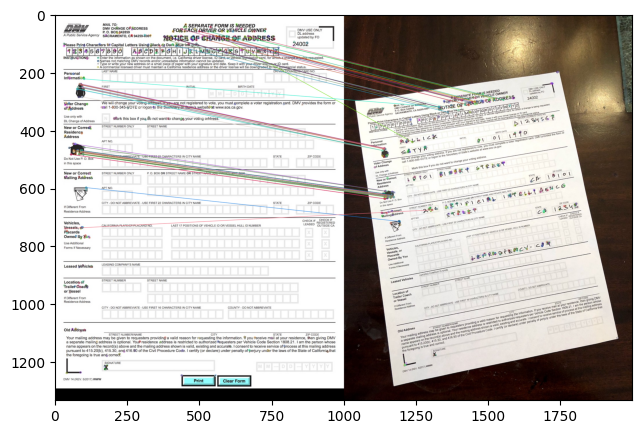

In [22]:
img_matches = cv2.drawMatches(template_img_rgb, template_keypoints, scanned_img_rgb, scanned_keypoints, matches, None)

plt.figure(figsize=[12,5])
plt.imshow(img_matches)

#### Find Homography

In [27]:
points_1 = np.zeros((len(matches), 2), dtype=np.float32)
points_2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points_1[i,:] = template_keypoints[match.queryIdx].pt
    points_2[i,:] = scanned_keypoints[match.trainIdx].pt

h, mask = cv2.findHomography(points_2, points_1, cv2.RANSAC)

In [28]:
h

array([[ 1.39432114e+00, -2.01356361e-01, -8.85795413e+00],
       [ 2.19075079e-01,  1.50167958e+00, -4.74938615e+02],
       [-6.18212366e-05,  1.07289091e-04,  1.00000000e+00]])

#### Wrap Image

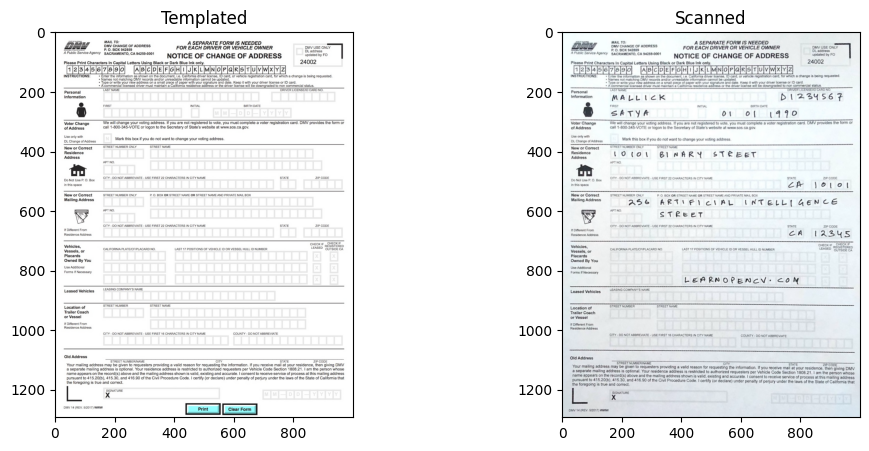

In [30]:
height, width, channel = template_img.shape

scanned = cv2.warpPerspective(scanned_img, h, (width, height))

plt.figure(figsize=[12,5])

plt.subplot(121);plt.imshow(template_img_rgb); plt.title("Templated");
plt.subplot(122);plt.imshow(scanned); plt.title("Scanned");